 
# PROJECT: THE MOVIE DATABASE

## BY: ADEJORO KEHINDE

## Table of Contents

<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>  
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclussions">Conclussions</a></li>
</ul>


# Introduction

In this project, I will be analysing a dataset containing information on movies. The dataset contains information about over 10,000 movies ranging from year 1960 to 2015.

### Objective of project
Describe the trends of some the dataset features, and also examine the relationship between the revenue feature of the dataset and other features such as budget, vote count, release year, popularity and runtime using correlation matrix.


### Specific objectives of the project work
The specific objectives of this project are to

1. Find out which year has the highest number of movies released?;
2. list the top 10 movie genres with highest vote count;
3. list the top 10 directors with highest number of movie titles;
4. list the top 10 genres with highest revenue;
5. find the the top 10 movies with highest revenue; and
6. examine the relationship between the revenue feature of the dataset and some other features such as vote count, popularity, budget, run time and release year using the correlation matrix.

### Importing the packages required for the analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Data Wrangling

### Importing and naming the dataset

In [2]:
data = pd.read_csv('tmdb-movies.csv')

We imported our dataset in the above line of code and we named it 'data'.

### Viewing the first five columns of the dataset

In [3]:
data.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015,137999939.3,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,6185,7.1,2015,137999939.3,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/2015,2480,6.3,2015,101199955.5,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/2015,5292,7.5,2015,183999919.0,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/2015,2947,7.3,2015,174799923.1,1.385749e+09


The data.head() gives us the first five columns of the dataset.

### Viewing the shape of the dataset

In [4]:
data.shape

(10866, 21)

This dataset contains information on 10,866 movies. 
The data has 10,866 rows and 21 columns.

### Summary Statistics of the dataset

In [5]:
data.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


The data.describe() command gives us a detailed summary statistics of the numerical features of the dataset.

### Information on data type and missing values in the dataset

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In this dataset, some of the columns have missing data, and we also observed that the release_date column has a wrong data type.

### Check for duplicated movies

We want to check for any movie that has duplicate record. 

In [7]:
data.duplicated().sum()

1

The line of code above shows that we have one duplicate record in the dataset.

### Checking for some unique features in some of the columns

### 1. Unique movie titles

In [8]:
data['original_title'].nunique()

10571

The above line of code shows that we have 10,571 unique movie titles in the dataset and some of the titles are listed below;

In [9]:
data['original_title'].unique()[0:10]

array(['Jurassic World', 'Mad Max: Fury Road', 'Insurgent',
       'Star Wars: The Force Awakens', 'Furious 7', 'The Revenant',
       'Terminator Genisys', 'The Martian', 'Minions', 'Inside Out'],
      dtype=object)

### 2. Unique movie directors list

In [10]:
data['director'].nunique()

5067

The above line of code shows that we have 5,067 unique movie directors in the dataset and some of the directors are listed below;

In [11]:
data['director'].unique()[0:10]

array(['Colin Trevorrow', 'George Miller', 'Robert Schwentke',
       'J.J. Abrams', 'James Wan', 'Alejandro GonzÃ¡lez IÃ±Ã¡rritu',
       'Alan Taylor', 'Ridley Scott', 'Kyle Balda|Pierre Coffin',
       'Pete Docter'], dtype=object)

### 3. Unique relase year

The code below shows the unique movie years movie was released

In [12]:
data['release_year'].unique()

array([2015, 2014, 1977, 2009, 2010, 1999, 2001, 2008, 2011, 2002, 1994,
       2012, 2003, 1997, 2013, 1985, 2005, 2006, 2004, 1972, 1980, 2007,
       1979, 1984, 1983, 1995, 1992, 1981, 1996, 2000, 1982, 1998, 1989,
       1991, 1988, 1987, 1968, 1974, 1975, 1962, 1964, 1971, 1990, 1961,
       1960, 1976, 1993, 1967, 1963, 1986, 1973, 1970, 1965, 1969, 1978,
       1966], dtype=int64)

The unique release year shows that the earliest movie was release in the year 1960 and the latest movie was released in 2015.

# Data Cleaning

### Dropping unwanted columns

We want to drop columns that are not relevant to our analysis such as id, imdb_id, homepage, and overview.

In [13]:
data.drop(['id','imdb_id','homepage','overview',], axis = 1, inplace = True)
data

,popularity,budget,revenue,original_title,cast,director,tagline,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/2015,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/2015,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/2015,2947,7.3,2015,1.747999e+08,1.385749e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10861,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,Bruce Brown,NaN,surfer|surfboard|surfing,95,Documentary,Bruce Brown Films,6/15/1966,11,7.4,1966,0.000000e+00,0.000000e+00
10862,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,car race|racing|formula 1,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/1966,20,5.7,1966,0.000000e+00,0.000000e+00
10863,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,Eldar Ryazanov,NaN,car|trolley|stealing car,94,Mystery|Comedy,Mosfilm,1/1/1966,11,6.5,1966,0.000000e+00,0.000000e+00
10864,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,Woody Allen,WOODY ALLEN STRIKES BACK!,spoof,80,Action|Comedy,Benedict Pictures Corp.,11/2/1966,22,5.4,1966,0.000000e+00,0.000000e+00


In [14]:
data.shape

(10866, 17)

The data.shape confirms that we have successfully dropped the four (4) columns.

### Missing dataset

In [15]:
data.isnull().sum()

popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
director                  44
tagline                 2824
keywords                1493
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

### Drop rows with null values 

In [17]:
data.dropna(inplace = True)

We had to drop all rows with null values because they are of the string data type.

In [18]:
data.isnull().sum()

popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
director                0
tagline                 0
keywords                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

In [19]:
data.shape

(7032, 17)

We have successfully dropped all rows with missing values.

### Drop rows with duplicate records

In [21]:
data.drop_duplicates(inplace = True)
data.shape

(7031, 17)

We have successfully dropped the row with duplicate value

After the cleaning, we have 7,031 rows and 17 columns.

# Exploratory Data Analysis

### 1. in what year do we have the highest number of movies released?

In [23]:
data_year = data.groupby('release_year').release_year.count().sort_values(ascending = False)[0:10]
data_year

release_year
2014    384
2013    346
2015    341
2011    306
2009    306
2012    286
2010    279
2008    269
2007    264
2006    260
Name: release_year, dtype: int64

The above result shows that the year with highest number of movies released is 2014.

### Defining a function for the bar plots

In [24]:
def plots(heading, xlabel, ylabel, title):
    plt.figure(figsize=(12,8))
    heading.plot(kind='bar')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    
    return plots

In [25]:
# calling the function written above
heading = data.groupby('release_year').release_year.count().sort_values(ascending = False)[0:10]


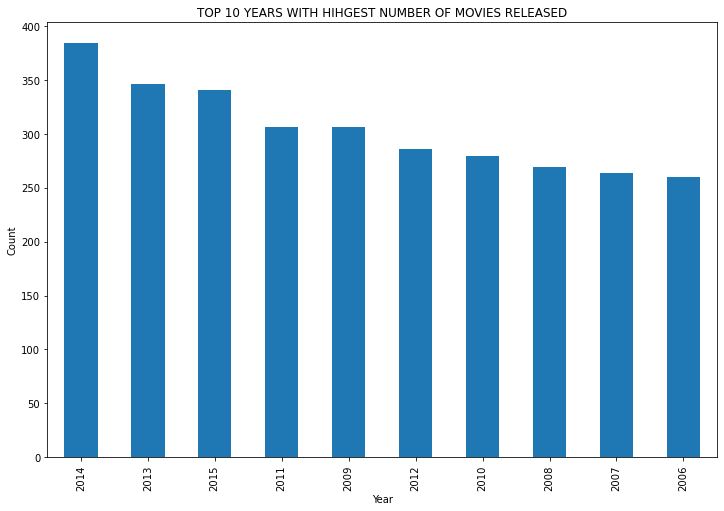

In [26]:
plots(heading, 'Year', 'Count', 'TOP 10 YEARS WITH HIHGEST NUMBER OF MOVIES RELEASED');

                    A bar chart displaying the top 10 movie release_years.

This above list shows the top 10 years with highest number of movies released, year 2014 has the hghest number of movies released with a total of 384 movies released which is also confirmed by the chart below.

### 2. List the top 10 movie genres with highest vote count.

In [28]:
top_10_movie_genres = data.groupby('genres').vote_count.count().sort_values(ascending = False).head(10)
top_10_movie_genres

genres
Comedy                  421
Drama                   411
Comedy|Romance          193
Horror|Thriller         185
Drama|Romance           177
Comedy|Drama            177
Horror                  162
Comedy|Drama|Romance    156
Drama|Thriller           96
Documentary              90
Name: vote_count, dtype: int64

### calling the function above to plot the bar chart

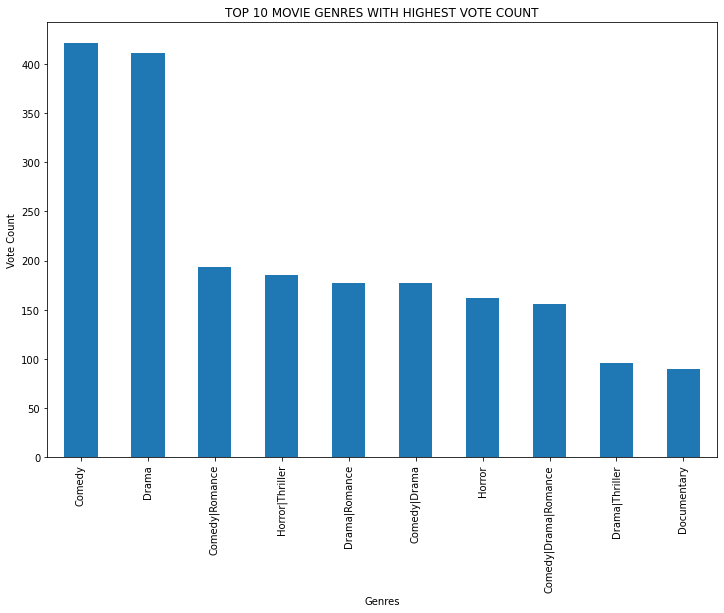

In [29]:

heading = data.groupby('genres').vote_count.count().sort_values(ascending = False).head(10)
plots(heading, 'Genres', 'Vote Count', 'TOP 10 MOVIE GENRES WITH HIGHEST VOTE COUNT');

           The bar plot above shows the list the top 10 movie genres with highest vote count

### 3. List the top 10 directors with highest number of movie titles.

In [30]:
director_with_highest_movie_title = data.groupby('director').original_title.count().sort_values(ascending = False).head(10)
director_with_highest_movie_title 

director
Steven Spielberg     28
Clint Eastwood       27
Ron Howard           22
Ridley Scott         22
Martin Scorsese      22
Woody Allen          21
Steven Soderbergh    20
Barry Levinson       19
Wes Craven           18
Tim Burton           18
Name: original_title, dtype: int64

### calling the function above to plot the bar chart

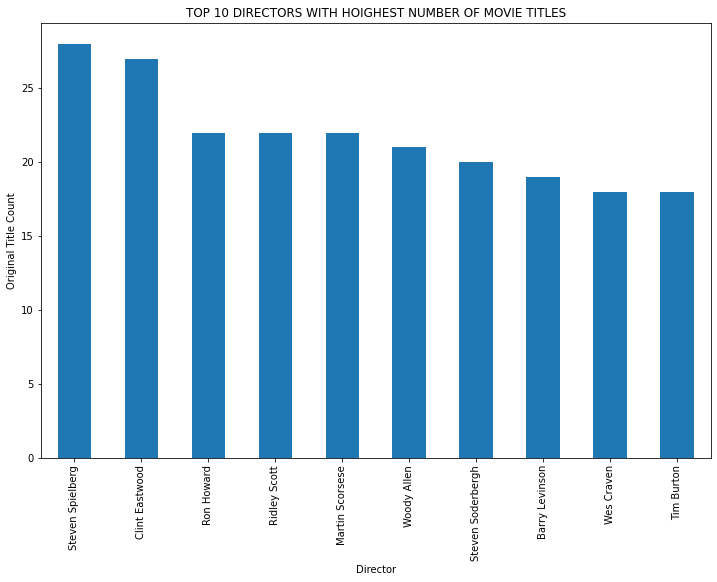

In [31]:
heading = data.groupby('director').original_title.count().sort_values(ascending = False).head(10)
plots(heading, 'Director', 'Original Title Count', 'TOP 10 DIRECTORS WITH HOIGHEST NUMBER OF MOVIE TITLES');

The above bar plot shows the top 10 directors with highest unique movie titles

### 4. List the top 10 genres with highest revenue

In [33]:
genres_with_highest_revenue = data.groupby('genres').revenue.sum().sort_values(ascending = False).head(10)
genres_with_highest_revenue

genres
Comedy                              19517216485
Drama                               14293455952
Comedy|Romance                      11127510397
Adventure|Fantasy|Action             7597483556
Animation|Family                     6530883026
Comedy|Drama|Romance                 6460766098
Action|Adventure|Science Fiction     6420484308
Drama|Romance                        6099062160
Adventure|Fantasy|Family             6079516484
Adventure|Action|Science Fiction     5256276988
Name: revenue, dtype: int64

### calling the function above to plot the bar chart

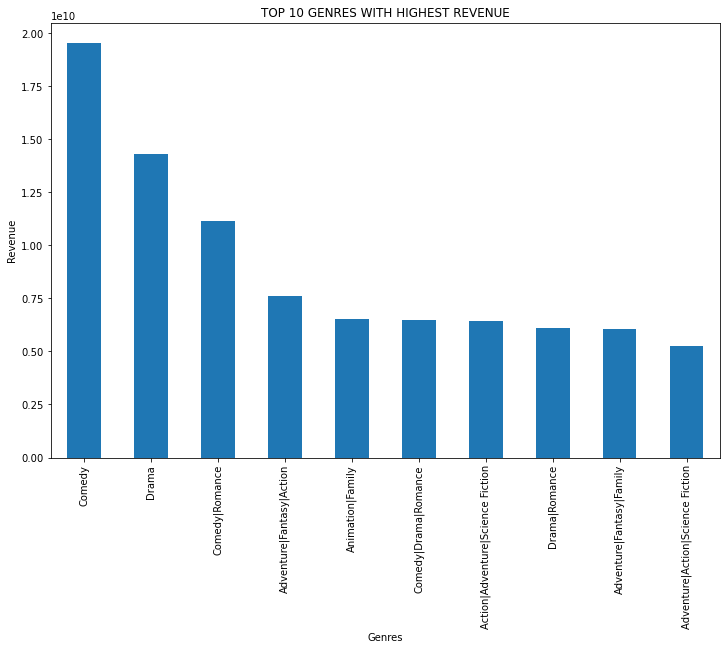

In [35]:
heading = data.groupby('genres').revenue.sum().sort_values(ascending = False).head(10)

plots(heading, 'Genres', 'Revenue', 'TOP 10 GENRES WITH HIGHEST REVENUE');

       The above table and bar plot shows the top 10 genres with highest generated revenue

### 5. Find the the top 10 movies with highest revenue

In [36]:
movie_title_with_highest_revenue = data.groupby('original_title').revenue.sum().sort_values(ascending = False).head(10)
movie_title_with_highest_revenue

original_title
Avatar                                          2781505847
Star Wars: The Force Awakens                    2068178225
Titanic                                         1845034188
The Avengers                                    1568080742
Jurassic World                                  1513528810
Furious 7                                       1506249360
Avengers: Age of Ultron                         1405035767
Harry Potter and the Deathly Hallows: Part 2    1327817822
Frozen                                          1277284869
Iron Man 3                                      1215439994
Name: revenue, dtype: int64

### calling the function above to plot the bar chart

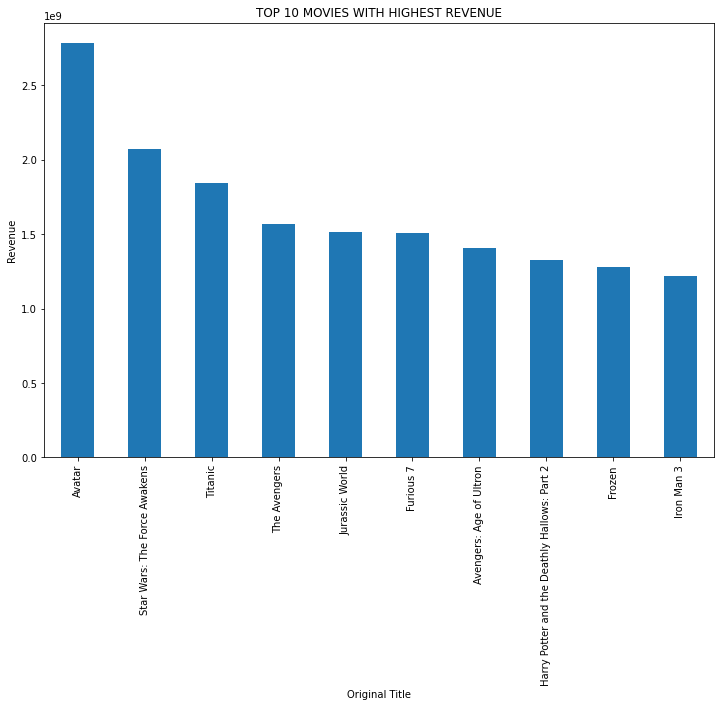

In [38]:
heading = data.groupby('original_title').revenue.sum().sort_values(ascending = False).head(10)

plots(heading, 'Original Title', 'Revenue', 'TOP 10 MOVIES WITH HIGHEST REVENUE');

The above table and bar plot shows the top 10 movies with highest revenue

## Single variable analysis for some features of the dataset

### 1. Distribution plot for budget

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


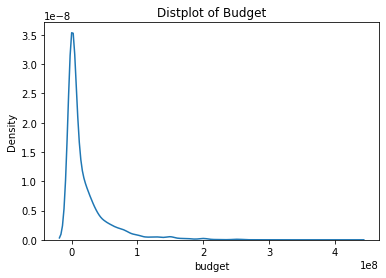

In [89]:
sns.distplot(data['budget'], hist = False).set(title = 'Distplot of Budget');

        Fig. 12: Distplot of Budget

The above plot is right or positively skewed. It informs us that all values in the budget column are positive.

### 2. Distribution plot for revenue

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


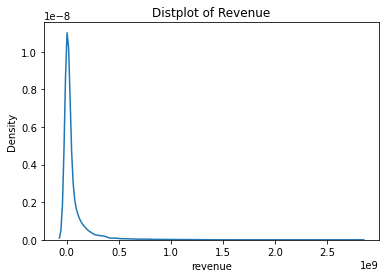

In [74]:
sns.distplot(data['revenue'], hist = False).set(title = 'Distplot of Revenue');

The above plot is right or positively skewed. It informs us that all values in the revenue column are positive.

### 3. Distribution plot for Vote Count

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


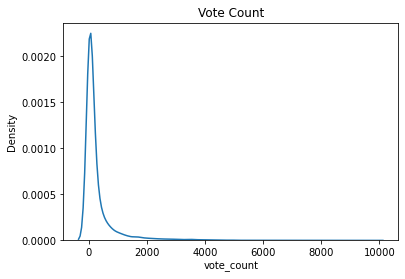

In [115]:
sns.distplot(data['vote_count'], hist = False).set(title = 'Vote Count');

The above plot shows that the dataset in the vote count column is positively skewed and that it also contain outliers.

### 4. Distribution plot of Runtime

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


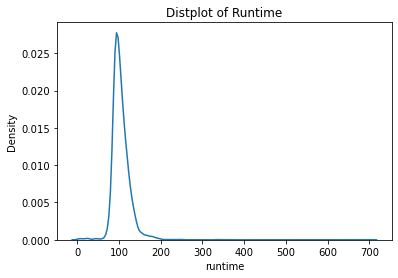

In [101]:
sns.distplot(data['runtime'], hist = False).set(title = 'Distplot of Runtime');

In [85]:
data['runtime'].mean()

104.83999431090884

The plot above shows the distplot of the runtime feature. The plot is a rght skewed plot, it shows that we have most of our values at the right hand side of the mean value. It also shows that the mean runtime is somewhere around 100 which was also confirmed by the `data['mean'].mean()` line of code above. 
Furthermore, it was discovered that the runtime value has outliers

In [114]:
data['runtime'].max()

705

### Histogram of the Release Year

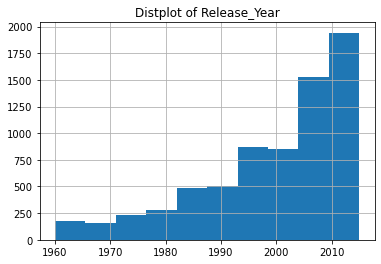

In [106]:
data['release_year'].hist().set(title = 'Histogram of Release_Year');

The plot above shows that the movie industry has enjoyed a steady increase in number of movies released per over the years.

### Correlation matrix

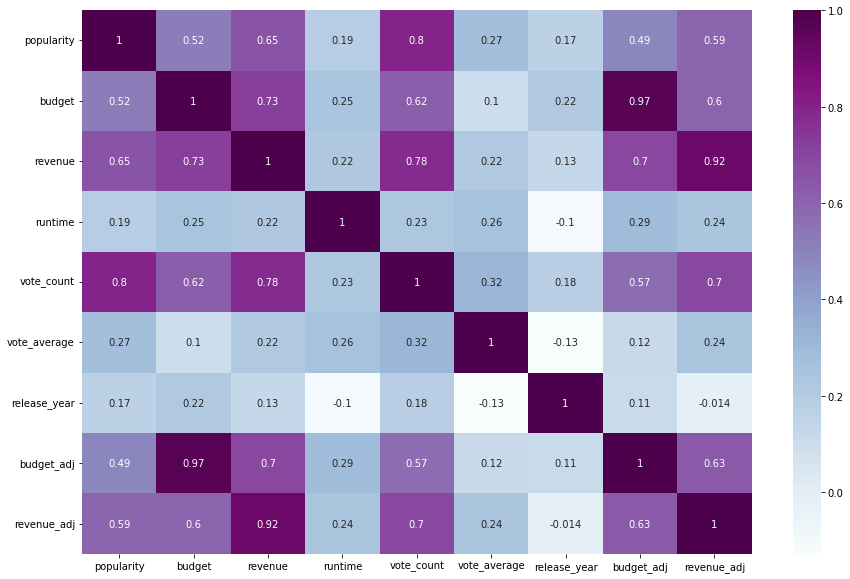

In [39]:
corr = data.corr()
plt.figure(figsize = (15,10))
sns.heatmap(corr, annot=True, cmap = 'BuPu');

The plot above shows the correlation matrix of the dataset. This shows the relationship between the numerical features of the dataset.

From the correlation matrix table above, we observed the following relationships with the revenue feature;
1. The correlation between the buudget and revenue is 0.73 which shows a strong correlation between the two dataset features
2. The correlation between the vote count and revenue is 0.78 which also shows a strong correlation between the two dataset features.
3. The correlation between the release year and revenue is 0.13. This shows a weak correlation between the two dataset features.
4. The correlation between popularity and revenue is 0.65 which shows a positive correlation between the two dataset features.
5. The correlation between the runtime and revenue is 0.22 which also shows a weak correlation between the two dataset features.



# Conclussion

### Results
The purpose of the project work is to describe the trends of some of the dataset features, and also examine the relationship between the revenue feature of the dataset and other features such as budget, vote count, release year, popularity and runtime.

The project uncovered some trends in the datasets features. The year with highest number of movies released is 2014, the genre with the highest vote count is Comedy. Steven Spielberg is the director with- highest number of movie titles released, he has 28 movie titles. We also uncovered that Comedy is the genre which recorded the highest revenue generated, comedy recorded USD 19,517,216,485. Further more, the movie title with the highest revenue generated is Avatar with USD 2,781,505,847. 

This project also examained and established that there is a positive relationship between revenue and some features such as budget, vote count and popularity.

Further studies can be done to ascertain the effect of each features on the revenue generated.

### Limitation

Two columns (Casts and Genres) of the datasets contain multiple values separated by pipe which made it impossible to analyse the individual casts and genres.